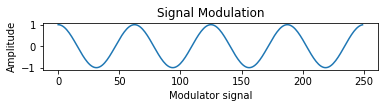

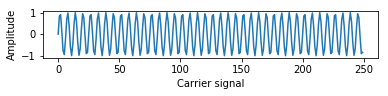

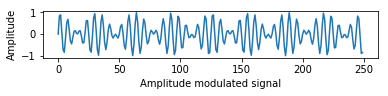

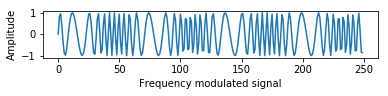

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Amplitude Modulation
def create_burst(mod_freq, car_freq): 
    time = np.arange(250) / 250
    modulator = np.cos(2.0 * np.pi * mod_freq * time)
    carrier = np.sin(2.0 * np.pi * car_freq * time)
    burst =  modulator * carrier
    return burst

burst = create_burst(4, 40)

# Frequency Modulation
def create_phasor(mod_freq, car_freq):
    modulation_index = 1
    time = np.arange(250) / 250
    modulator = np.cos(2.0 * np.pi * mod_freq * time) * modulation_index
    carrier = np.sin(2.0 * np.pi * car_freq * time)
    phasor = np.zeros_like(modulator)

    for i, t in enumerate(time):
        phasor[i] = np.sin(2. * np.pi * (car_freq * t + modulator[i]))  
    return phasor, modulator, carrier

phasor, modulator, carrier = create_phasor(4,40)      

plt.subplot(4, 1, 1)
plt.title('Signal Modulation')
plt.plot(modulator)
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.show()
plt.subplot(4, 1, 2)
plt.plot(carrier)
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
plt.show()
plt.subplot(4, 1, 3)
plt.plot(burst)
plt.ylabel('Amplitude')
plt.xlabel('Amplitude modulated signal')
plt.show()
plt.subplot(4, 1, 4)
plt.plot(phasor)
plt.ylabel('Amplitude')
plt.xlabel('Frequency modulated signal')
plt.show()


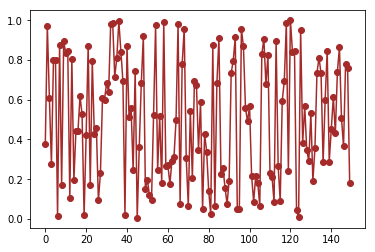

In [12]:
## Generating a random signal
import numpy as np
import matplotlib.pyplot as plt

time = np.arange(150)
sign = np.random.rand(150,1)

plt.plot(time, sign, marker='o', color='brown')

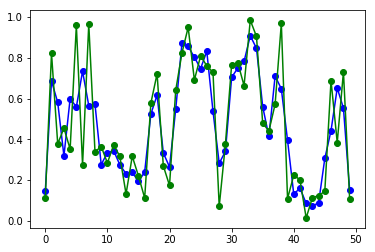

In [53]:
## Smoothing a signal
from scipy.signal import savgol_filter

yhat = savgol_filter(signal, 5, 3, axis=0)
plt.plot(time, yhat, marker='o', color='blue')
plt.plot(time, signal, marker='o', color='green')

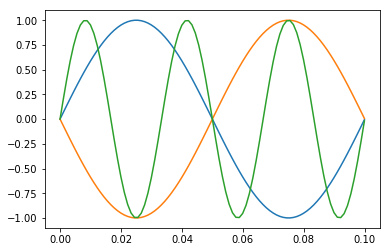

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f = [10, 30] # Frequency of 10 hertz
#T = [1/f[0], 1/f[1]] --> NOT WORKING
T = [0.1, 0.0333]
#time = [np.linspace(0, 1/f[0], 10), np.linspace(0, 1/f[1], 10)]   # 5 samples, starting at 0 seconds until end of cycle
time = [np.arange(0, T[0], T[1]/30), np.arange(0, T[1], T[1]/30)]
phase_diff = [0, np.pi] # Phase difference between stimulators

#print(time[0])

alpha_0 = np.sin(f[0] * time[0] * 2 * np.pi + phase_diff[0])
alpha_180 = np.sin(f[0] * time[0] * 2 * np.pi + phase_diff[1])
gamma_0 = np.sin(f[1] * time[0] * 2 * np.pi + phase_diff[0])

#print(alpha_0)
#print(alpha_180)
#print(gamma_0)

plt.plot(time[0],alpha_0)
plt.plot(time[0],alpha_180)
plt.plot(time[0],gamma_0)


1.5.s +/- .2 s


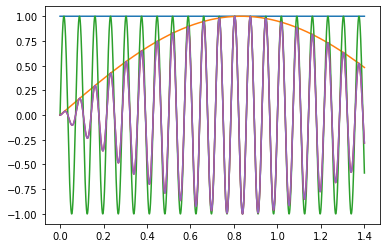

In [42]:
# Mixing AM & a Square signal
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
# import simpleaudio as sa
 
#numb =  9 # Number of seconds    
# Time --> Sampling: 250 Hz
#time = np.linspace(0, 1*numb, 250*numb, endpoint=True)

###
sample_rate = 44100
T = 1.4
time = np.linspace(0, T, T * sample_rate, False)
###

# Square signal --> 33% Duty Cycle Pulse waveform
squa = 0.5 + 0.5 * signal.square(2*np.pi*0.2*time, 1/3)

# AM
mod_freq = 0.3
car_freq = 14
modulator = np.sin(2.0 * np.pi * mod_freq * time)
carrier = np.sin(2.0 * np.pi * car_freq * time)
burst =  modulator * carrier

# Plot singles
plt.figure(1)
plt.plot(time,squa)
plt.plot(time,modulator)
plt.plot(time,carrier)
plt.plot(time,burst)

# Signal multiplication
#plt.figure(2)
final = burst * squa
print('1.5.s +/- .2 s')
plt.plot(time, final)

# # concatenate notes
# audio = np.hstack((burst * squa))#, Csh_note, E_note))
# # normalize to 16-bit range
# audio *= 32767 / np.max(np.abs(audio))
# # convert to 16-bit data
# audio = audio.astype(np.int16)

# # start        
# play_obj = sa.play_buffer(audio, 1, 2, sample_rate)

# # waplaybackit for playback to finish before exiting
# play_obj.wait_done()

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


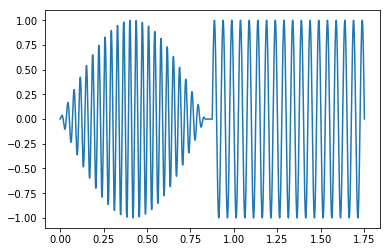

In [21]:
# Concatenating two signals that have nothing to do with each other
# This code depends on the previous one
b = np.sin(2*np.pi*10*time)
a = np.concatenate((final, b), 0)
time2 = np.linspace(0, T, T * 44100*2, False)
plt.plot(time2, a)


[ 2.5  6.5  1.5  3.5  4.5  0.5  3.5  6.5  2.5 10.5  1.5  2.5  1.5  1.5
  2.5 13.5  4.5  1.5  1.5  4.5  3.5  3.5  0.5  9.5  1.5  5.5  5.5  2.5
  0.5  6.5  8.5  7.5  2.5  3.5  5.5  3.5  2.5 11.5  2.5  0.5  0.5  4.5
  2.5  1.5]
Duration
247.8


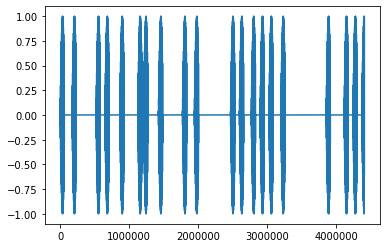

In [43]:
intervals = np.genfromtxt('/home/robertofelipe_sg/ownCloud/Code/Python/SignAX/ISI.txt')#.astype(np.int64)
print(intervals)
suma = 0
conc = np.zeros(0)
for b, i in enumerate(intervals):
    suma = suma + i
    flat = np.zeros(int(i*44100))
    conc = np.concatenate([conc, final, flat], 0)
np.save('spindles_4min',conc)
print('Duration')
print(suma+1.7*intervals.shape[0])
plt.plot(conc[:44100*100])

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


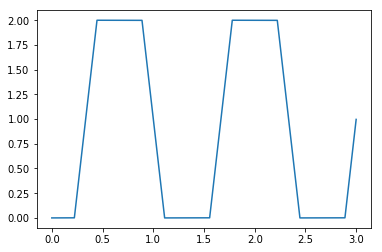

In [58]:
# Cutting up a Sawtooth signal for rtDCS
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import simpleaudio as sa

# numb =  3 # Number of seconds    
# # Time --> Sampling: 250 Hz
# time = np.linspace(0, 1*numb, 250*numb, endpoint=True)

###
sample_rate = 44100
T = (1/f)*2 + 0.333 # time shift x-axis
time = np.linspace(0, T, T * sample_rate, False)
f = 0.75
###

# Sawtooth 
tria = 1 + signal.sawtooth(2*np.pi*f*time, 1/2)

# Square signal --> 33% Duty Cycle Pulse waveform
squa = 1 + (1/3)*signal.square(2*np.pi*f*time + (np.pi+np.pi/3), 1/3)

# Plot singles
#plt.figure(1)
#plt.plot(time,tria)
#plt.plot(time,squa)

# Plot coupled
coupled = np.ones(len(time))
#plt.plot(time,coupled)
for i in range(time.shape[0]):
    if tria[i] > 2/3 and tria[i] < 4/3:
        coupled[i] = tria[i]
    elif tria[i] < 2/3 or tria[i] < 4/3:
        coupled[i] = squa[i]
    else:
        coupled[i] = squa[i]
coupled = coupled -1 # Take off DC offset
coupled = (1/max(coupled))*coupled +1 # Offset: Only positive values
plt.figure()
plt.plot(time,coupled)
# plt.plot(time,tria)
# plt.plot(time,squa)
np.save('slowosc_4min',coupled)

# # concatenate notes
# audio = coupled#, Csh_note, E_note))
# # normalize to 16-bit range
# audio *= 32767 / np.max(np.abs(audio))
# # convert to 16-bit data
# audio = audio.astype(np.int16)

# # start playback
# play_obj = sa.play_buffer(audio, 1, 2, sample_rate)

# # wait for playback to finish before exiting
# play_obj.wait_done()


In [40]:
1/14

0.07142857142857142